In [1]:
### 데이터 수집
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7,
                   30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 
                   32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 
                   34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 
                   36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 
                   9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 
                   11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 
                   500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                   500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 
                   610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                   700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
                   920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 
                   7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 
                   12.2, 19.7, 19.9]

In [2]:
print(len(fish_length), len(fish_weight))

49 49


In [3]:
### 2차원 데이터
### 변수 이름 : fish_data
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

In [4]:
### 타겟(정답) 1차원 데이터 생성하기
# - 변수명 : fish_target
# - fish_data의 인덱스 순서에 맞게 0~34까지는 1로(35개)
#                                         35~48까지는 0으로(14개)
fish_target = [1] * 35 + [0] * 14

### 위 데이터 변환을 넘파이 라이브러리 활용

In [5]:
### numpy 라이브러리 쓰는게 조금 더 빠름(데이터 많을 때)
import numpy as np

In [6]:
### fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
# 넘파이 함수 column_stack() : 두 데이터를 하나의 리스트형태로 묶어서 만들기
# - 튜플()형태로 감싸주어야 합니다.
fish_data = np.column_stack((fish_length, fish_weight))
fish_data.shape

(49, 2)

In [7]:
### fish_target = [1] * 35 + [0] * 14
# - concatenate() : 튜플에 있는 2개의 값 합치기
# - ones(생성할 개수) : 1값을 개수만큼 배열로 생성시킴
# - zeros(생성할 개수) : 0값을 개수만큼 배열로 생성시킴
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [8]:
### 데이터를 랜덤하게 섞어서, 훈련 및 테스트 데이터로 반환해주는 라이브러리 함수 사용

In [9]:
### 훈련 및 테스트데이터를 랜덤하게 섞어서 지정한 비율로 분류하기
# - 무조건 기억하기(항상 사용될 예정..)
from sklearn.model_selection import train_test_split

### train_test_split(독립변수, 종속변수, 랜덤규칙, 분류비율)
# - test_size : 정의된 비율로 분류시킴
# - 훈련(75=0.75) : 테스트(25=0.25)

# - stratify : 타겟의 비율을 기준으로 적절하게 편향을 조정해 줍니다.

### 반환 순서 : 훈련독립변수, 테스트독립변수, 훈련종속변수, 테스트종속변수
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, test_size=0.25, stratify=fish_target)

print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(36, 2) (13, 2) (36,) (13,)


In [10]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [11]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

# 임의 생선 길이와 무게로 예측(생선이름)하기

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
### 훈련모델 생성
kn = KNeighborsClassifier(n_neighbors=5)

### 훈련시키기
kn.fit(train_input, train_target)

## 정확도(평가) 확인
kn.score(test_input, test_target)

1.0

In [14]:
### 임의의 길이와 무게로 생성 예측하기
# 길이=25cm, 무게=150g
# - 예측하기
kn.predict([[25, 150]])

array([0.])

In [15]:
import matplotlib.pyplot as plt

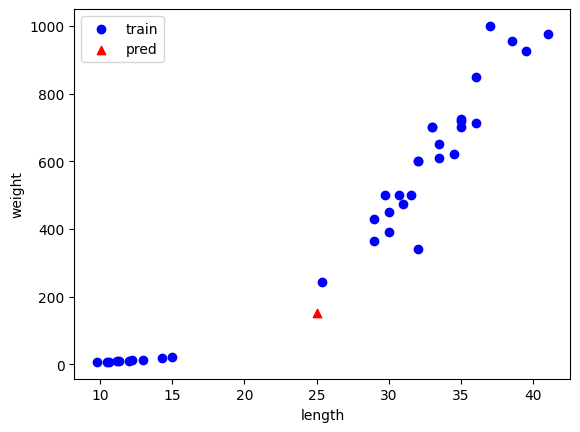

In [16]:
### 훈련 전체 데이터의 분포와 임의 데이터의 위치를 확인하기 위한
#    - 산점도 시각화하기

# - 훈련 데이터
plt.scatter(train_input[:, 0], train_input[:, 1], c="blue", label="train")

# - 임의 데이터
plt.scatter(25, 150, marker="^", c="red", label="pred")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

In [17]:
### 모델에서 사용한 이웃의 위치 확인하기
# 첫번째 값 : 이웃과의 거리
# 두번째 값 : 이웃의 위치 인덱스(훈련데이터의 인덱스값)
distances, indexes = kn.kneighbors([[25, 150]])
indexes

array([[21, 33, 19, 30,  1]], dtype=int64)

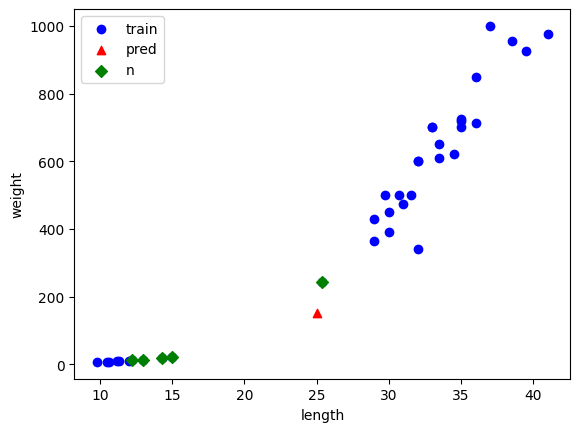

In [18]:
import matplotlib.pyplot as plt

# - 훈련 데이터
plt.scatter(train_input[:, 0], train_input[:, 1], c="blue", label="train")

# - 임의 데이터
plt.scatter(25, 150, marker="^", c="red", label="pred")

# - 이웃의 위치
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker="D", c="green", label="n")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

### (해석)
# - 예측결과는 빙어(0의 값)를 확인하였으나,
# - 시각적으로 확인했을 때는 도미에 가까운 것으로 확인됨
# - 이런 현상은 x축과 y축의 단위가 서로 다르기 때문에 일어남
# - y축의 값의 범위가 매우 큼..
# - y축으로의 높이가 조금이라도 커지면 거리는 매우 차이가 나게 됨
# *** 이런 현상을 "스케일이 다르다"라고 표현합니다.

### <스케일을 통일 시키기>
# - x축과 y축의 값의 범위를 통일 시키면 됩니다.
# *** 이러한 작업을 "정규화" 또는 "표준화" 작업이라고 합니다.

### 정규화 작업

In [19]:
"""
<표준점수(standard score)화하기>
 - 스케일을 맞추는 전처리 방법 중 한가지
 - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값
 - 표준점수 = (각 데이터 - 데이터셋 전체 평균) / 데이터셋 전체 표준편차
 - 평균과 표준편차 계산은 모두 넘파이에서 제공하는 함수 사용..
"""

'\n<표준점수(standard score)화하기>\n - 스케일을 맞추는 전처리 방법 중 한가지\n - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값\n - 표준점수 = (각 데이터 - 데이터셋 전체 평균) / 데이터셋 전체 표준편차\n - 평균과 표준편차 계산은 모두 넘파이에서 제공하는 함수 사용..\n'

In [20]:
### 평균 구하기
# - 훈련데이터의 각 특성(길이, 무게)마다 평균 구하기
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [21]:
### 표준편차 구하기
# - 훈련데이터의 각 특성(길이, 무게)마다 표준편차 구하기
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [22]:
### 표준점수화 시키기 -> 정규화 시키기(데이터 일반화)
# - 훈련데이터의 각 데이터를 표준점수화하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

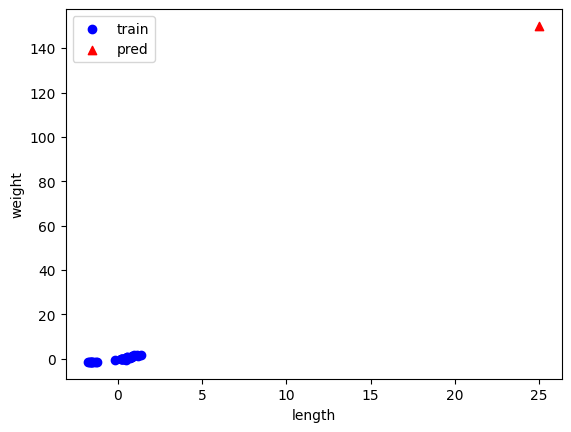

In [23]:
import matplotlib.pyplot as plt

# - 훈련 데이터
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="blue", label="train")

# - 임의 데이터
plt.scatter(25, 150, marker="^", c="red", label="pred")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

In [24]:
### 임의 예측하고자 하는 데이터가 있다면
# -->> 정규화를 시킨 후 사용해야 합니다.
new = ([25, 150] - mean) / std
new

array([-0.23012627, -0.94060693])

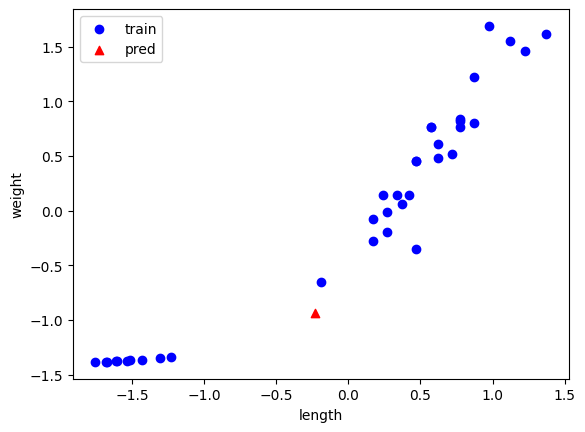

In [25]:
import matplotlib.pyplot as plt

# - 훈련 데이터
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="blue", label="train")

# - 임의 데이터
plt.scatter(new[0], new[1], marker="^", c="red", label="pred")

plt.xlabel("length")
plt.ylabel("weight")

plt.legend()

plt.show()

### 정규화 데이터로 예측하기

In [26]:
### 훈련모델 생성하기
kn = KNeighborsClassifier(n_neighbors=5)

In [27]:
### 훈련시키기
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [28]:
### 정확도(평가) 확인하기
# - 훈련시킬 때 사용한 데이터의 형태를 맞추어야 합니다.
# - 테스트데이터도 정규화 진행..
test_input = (test_input - mean) / std
kn.score(test_input, test_target)

1.0

In [29]:
### 임의 데이터로 예측하기
# - 2차원으로 만들어서 넣어주어야 합니다.
# - new는 1차원이므로, 리스트로 한번 더 감싸서 2차원으로 만들기
kn.predict([new])

array([1.])

In [30]:
### 사용된 이웃의 거리와 값의 위치(인덱스) 확인하기
distances, indexes = kn.kneighbors([new])
print(distances)
print(indexes)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
[[21 14 34 32  5]]


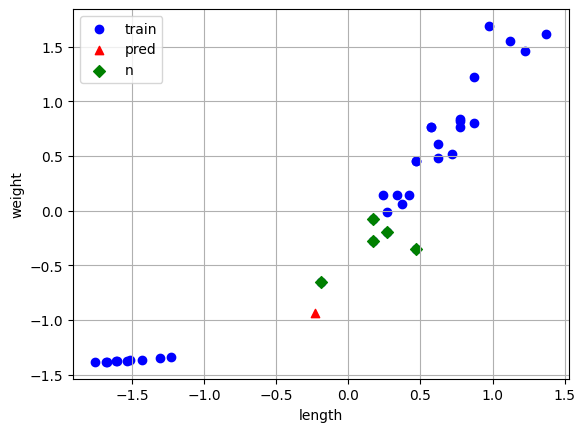

In [31]:
### 훈련데이터 전체 + 임의 데이터 + 이웃데이터 시각화하기
import matplotlib.pyplot as plt

# - 훈련 데이터
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c="blue", label="train")

# - 임의 데이터
plt.scatter(new[0], new[1], marker="^", c="red", label="pred")

# - 이웃 데이터
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker="D", c="green", label="n")

plt.xlabel("length")
plt.ylabel("weight")

plt.grid()
plt.legend()

plt.show()